# <center>Instituto Tecnológico de Estudios Superiores de Occidente</center>



<img style="float: center" src="logo-ITESO-png.png" width="350px" height="125px"/>




#### <center>"Simulación Matemática"</center>


### <center>SIMULACIÓN DEL MODELO PRESA-DEPREDADOR</center>

.



**<center>Profesor: Gabriel Alejando Morales Ruiz</center>**

.



**<center>Leonardo Rodríguez Hernández - 741983</center>**



**<center>Valenzuela Lafarga Mariana - 749770</center>**



**<center>Nancy Woolrich Sorroza - 741983</center>**



.


**<center>09 de mayo 2024.</center>**

## <center> Simulación del modelo presa - depredador</center>

### Introducción

Las ecuaciones diferenciales sirven para explicar matemáticamente los fenómenos y comportamientos que se presentan en la naturaleza, esto ayuda a los seres humanos a comprender, explicar y predecirlos. Uno de los modelos base que se utilizan son los de la ley de crecimiento natural que se basó en la suposición de que la población crece a una tasa proporcional al tamaño de la población:

$$\frac{dP}{dt}=kP$$

En general, P(t) es el valor de una cantidad en el tiempo t y su rapidez de cambio con respecto a t es proporcional a su tamaño P (t) en cualquier momento, esqto quiere decir que si k es positiva, entonces se incrementa la población, por el contrario si k es negativa, decrece.

Este modelo es base para poder explicar modelos más realistas del comportamiento de dos tipos de poblaciones diferentes que habitan en un mismo hábitad.

### Objetivos

#### 1.1 Objetivo general.

- Desarrollar un modelo matemático que represente el modelo presa-depredador.

#### 1.2 Objetivos específicos

- Implementar el modelo en Python para simular el modelo.

- Observar los cambios en ambos niveles de población algún punto del tiempo para describirlos y analizarlos.

- Visualizar los resultados de la simulación para comprender mejor la dinámica de la interacción de las dos poblaciones.


### Modelo del problema.
Para simular la interacción presa- depredador, se utiliza el modelo de crecimiento logístico, que es comúnmente utilizado en epidemiología y ecología para describir el crecimiento de una población en un entorno limitado e implementarlo en un modelo más realista que toma en cuenta a dos especies coexistiendo en un mismo habitad. El modelo de crecimiento logístico se define por la siguiente ecuación diferencial:

$$\frac {dR}{dt}=kR-aRW$$

$$\frac {dW}{dt}=-rW+bRW$$

Donde:

R(t) es la población de presas

W(t) es la población de depredadores

k, r a y b son constantes positivas

RW  representa  a las dos especies se encuentran entre sí con una frecuencia
que es proporcional a ambas poblaciones.

### Simulaciones y visualización de simulaciones.



Con ayuda de **solve_ivp** se va a generar la solución de este modelo denominado Lotka-Volterra, con valores para las constantes de $k=0.1$, $a=0.02$, $r=0.1$ y $b=0.01$, los cuales son los valores más comunes para entender este modelo.

Además se van a comparar las diferencias de tener en un tiempo inicial, primero: más depredadores que presas, segundo:  más presas que depredadores y tercero: igual número de presas y depredadores.

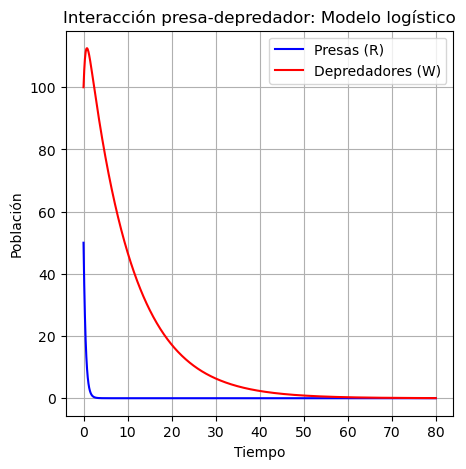

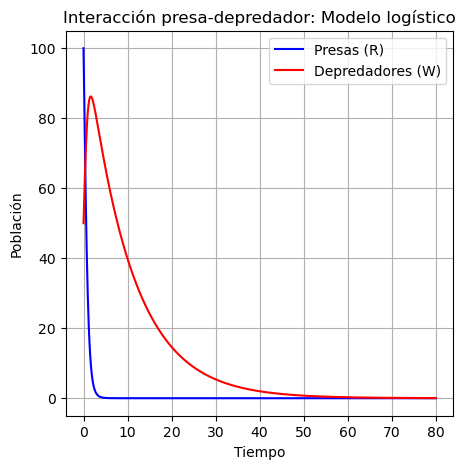

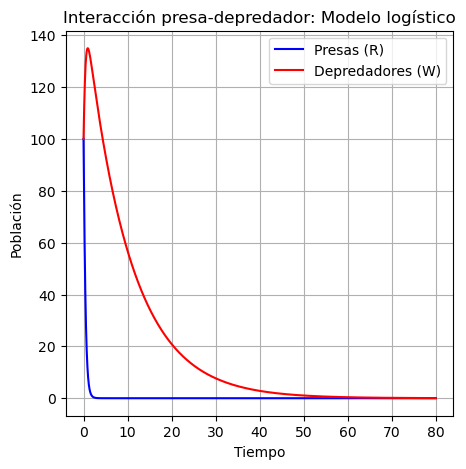

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

def LotkaVolterra(t, X, k, a, r, b):
    R, W = X
    dR_dt = k * R - a * R * W
    dW_dt = -r * W + b * R * W
    return [dR_dt, dW_dt]

k = 0.1  # Tasa de crecimiento de presas en ausencia de depredadores
a = 0.02  # Tasa de interacción entre presas y depredadores
r = 0.1  # Tasa de disminución de depredadores en ausencia de presas
b = 0.01  # Tasa de reproducción de depredadores por presas



#EXPERIMENTO 1: MAYOR NÚMERO DE DEPREDADORES t(0)

R0 = 50  # Población inicial de presas
W0 = 100  # Población inicial de depredadores
condiciones_iniciales = [R0, W0]

tspan = [0,80]
t_eval = np.linspace(tspan[0], tspan[1], 1000)

solucion = solve_ivp(LotkaVolterra, tspan, condiciones_iniciales, args=(k, a, r, b), t_eval=t_eval)

plt.figure(figsize=(5, 5))
plt.plot(solucion.t, solucion.y[0], label='Presas (R)', color='blue')
plt.plot(solucion.t, solucion.y[1], label='Depredadores (W)', color='red')
plt.title('Interacción presa-depredador: Modelo logístico')
plt.xlabel('Tiempo')
plt.ylabel('Población')
plt.legend(loc='best')
plt.grid()
plt.show()



#EXPERIMENTO 2: MAYOR NÚMERO DE PRESAS t(0)

R0 = 100  # Población inicial de presas
W0 = 50  # Población inicial de depredadores
condiciones_iniciales2 = [R0, W0]

solucion = solve_ivp(LotkaVolterra, tspan, condiciones_iniciales2, args=(k, a, r, b), t_eval=t_eval)
plt.figure(figsize=(5, 5))
plt.plot(solucion.t, solucion.y[0], label='Presas (R)', color='blue')
plt.plot(solucion.t, solucion.y[1], label='Depredadores (W)', color='red')
plt.title('Interacción presa-depredador: Modelo logístico')
plt.xlabel('Tiempo')
plt.ylabel('Población')
plt.legend(loc='best')
plt.grid()
plt.show()



#EXPERIMENTO 1: IGUAL NÚMERO DE DEPREDADORES Y PRESAS t(0)

R0 = 100  # Población inicial de presas
W0 = 100  # Población inicial de depredadores
condiciones_iniciales3 = [R0, W0]

solucion = solve_ivp(LotkaVolterra, tspan, condiciones_iniciales3, args=(k, a, r, b), t_eval=t_eval)
plt.figure(figsize=(5, 5))
plt.plot(solucion.t, solucion.y[0], label='Presas (R)', color='blue')
plt.plot(solucion.t, solucion.y[1], label='Depredadores (W)', color='red')
plt.title('Interacción presa-depredador: Modelo logístico')
plt.xlabel('Tiempo')
plt.ylabel('Población')
plt.legend(loc='best')
plt.grid()
plt.show()

> Las limitantes de este modelo es que no se consideran variables como enfermedades, escacez de alimento, o modificación del hábitad, es por ello que es un modelo que puede o no cumplirse en la realidad, sin embargo da una idea de lo que llegaría a pasar.

Ahora se va a comparar para las constantes k, a, r, b, qué cambio ocurre al variar cada una por separado en el comportamiento en el tiempo de estas dos especies.

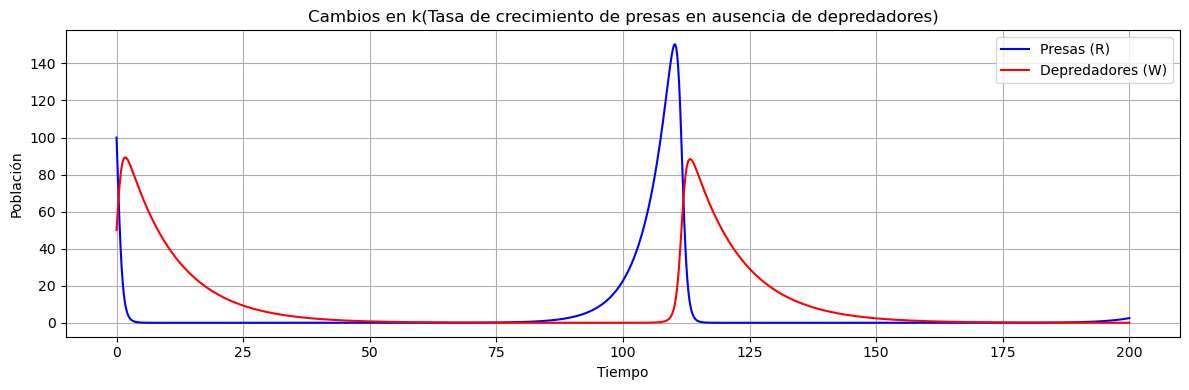

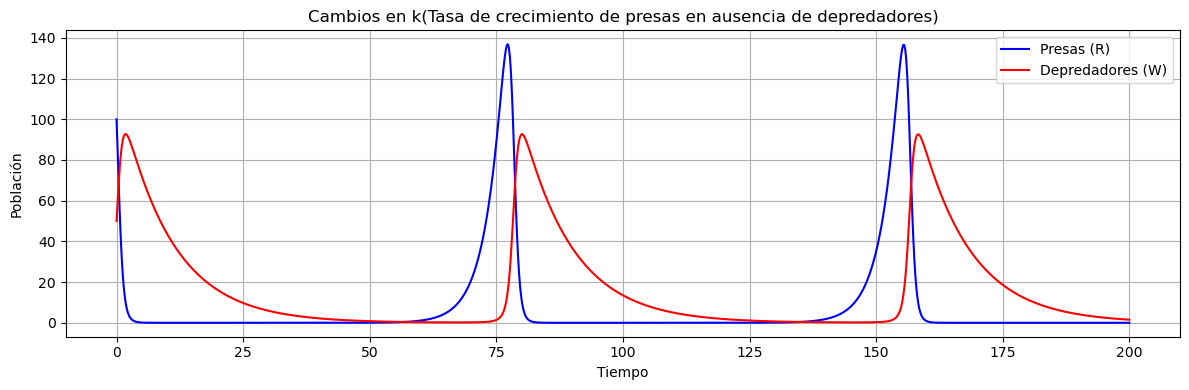

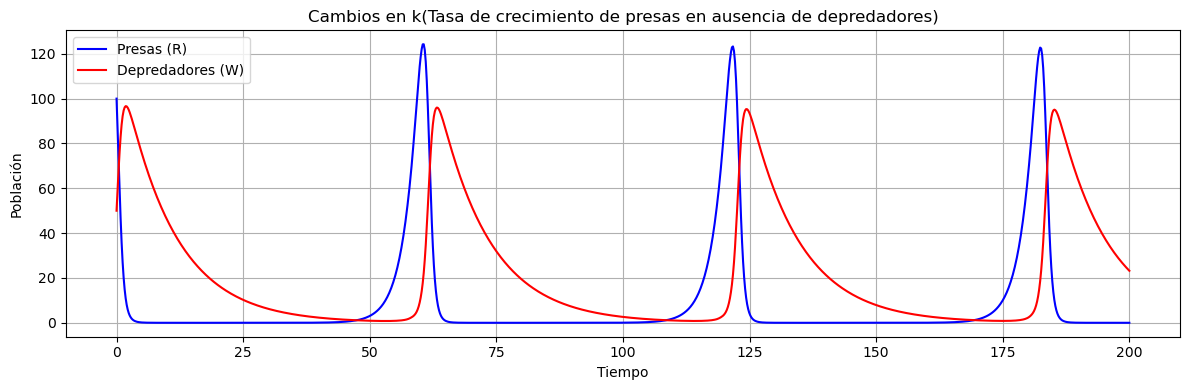

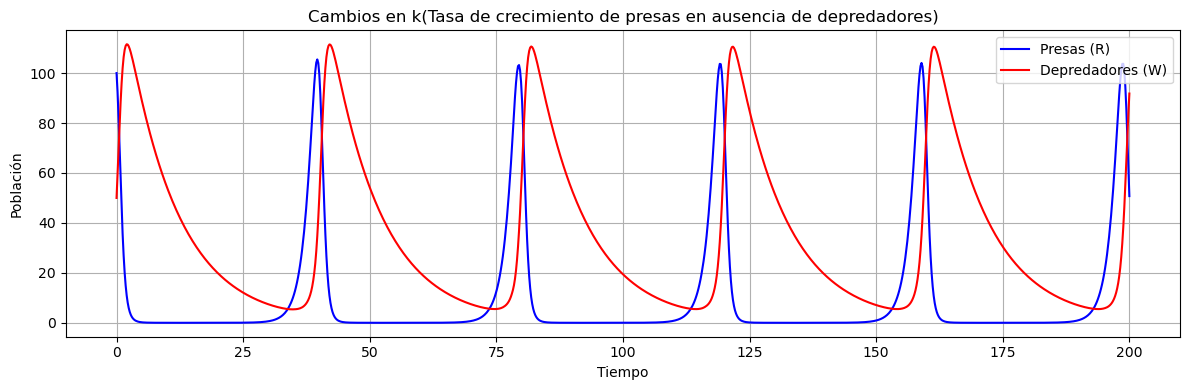

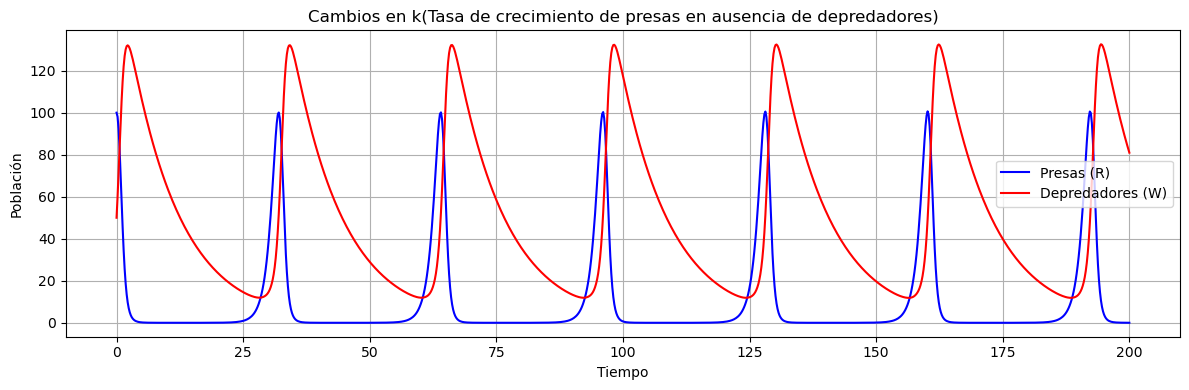

In [20]:
#CAMBIOS PARA K

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

def LotkaVolterra(t, X, k, a, r, b):
    R, W = X
    dR_dt = k * R - a * R * W
    dW_dt = -r * W + b * R * W
    return [dR_dt, dW_dt]


condiciones_k= [[0.2,0.02,0.1,0.01],[0.3,0.02,0.1,0.01],[0.4,0.02,0.1,0.01],[0.7,0.02,0.1,0.01],[1,0.02,0.1,0.01]]
condiciones_a= [[0.1,0.03,0.1,0.01],[0.1,0.04,0.1,0.01],[0.1,0.05,0.1,0.01],[0.1,0.07,0.1,0.01],[0.1,0.10,0.1,0.01]]
condiciones_r= [[0.1,0.02,0.2,0.01],[0.1,0.02,0.3,0.01],[0.1,0.02,0.4,0.01],[0.1,0.02,0.7,0.01],[0.1,0.02,1,0.01]]
condiciones_b= [[0.1,0.02,0.1,0.02],[0.1,0.02,0.1,0.03],[0.1,0.02,0.1,0.04],[0.1,0.02,0.1,0.07],[0.1,0.02,0.1,0.10]]

                      
k = 0.1  # Tasa de crecimiento de presas en ausencia de depredadores
a = 0.02  # Tasa de interacción entre presas y depredadores
r = 0.1  # Tasa de disminución de depredadores en ausencia de presas
b = 0.01  # Tasa de reproducción de depredadores por presas

R0 = 100  # Población inicial de presas
W0 = 50# Población inicial de depredadores 
condiciones_iniciales = [R0, W0]
condiciones_neutras= [0.1,0.02,0.1,0.01]

t_eval = np.linspace(tspan[0], tspan[1], 1000)

for i, ic in enumerate(condiciones_k):
    tspan = [0,200]
    t_eval = np.linspace(*tspan, 1000) 
    solucion_k = solve_ivp(LotkaVolterra, tspan, condiciones_iniciales, args = ic, t_eval=t_eval)
    plt.figure(figsize=(12, 4))
    plt.plot(solucion_k.t, solucion_k.y[0], label='Presas (R)', color='blue')
    plt.plot(solucion_k.t, solucion_k.y[1], label='Depredadores (W)', color='red')
    plt.title("Cambios en k(Tasa de crecimiento de presas en ausencia de depredadores)")
    plt.xlabel('Tiempo')
    plt.ylabel('Población')
    plt.legend(loc='best')
    plt.grid()
    plt.tight_layout()

    plt.show()



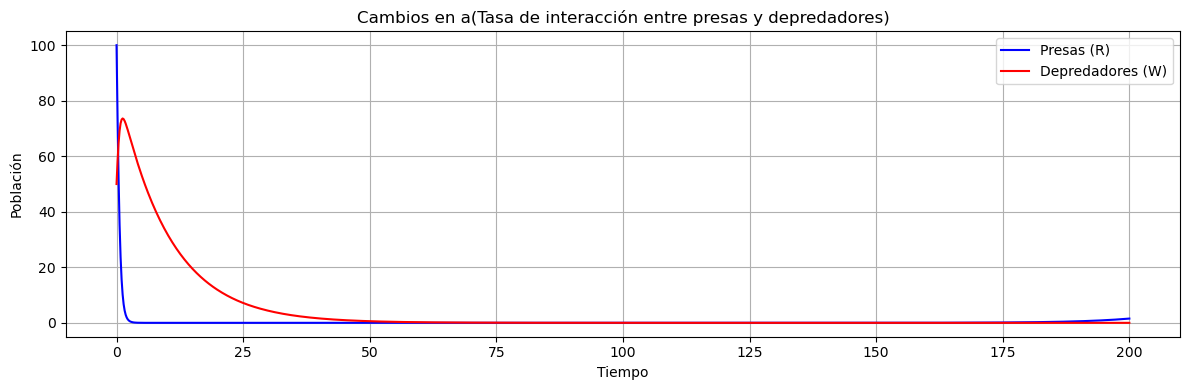

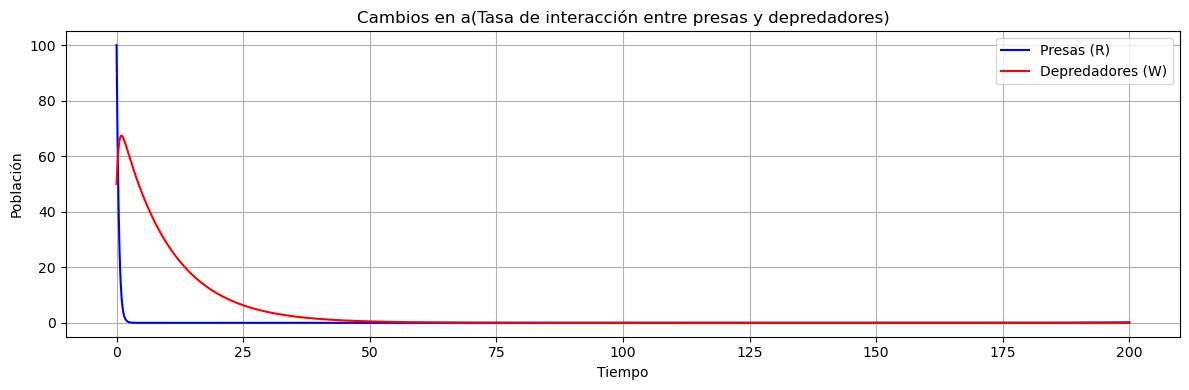

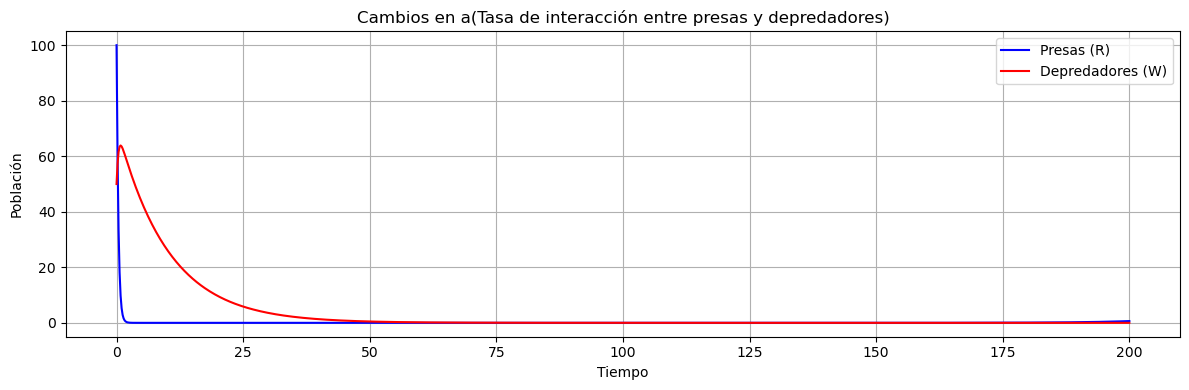

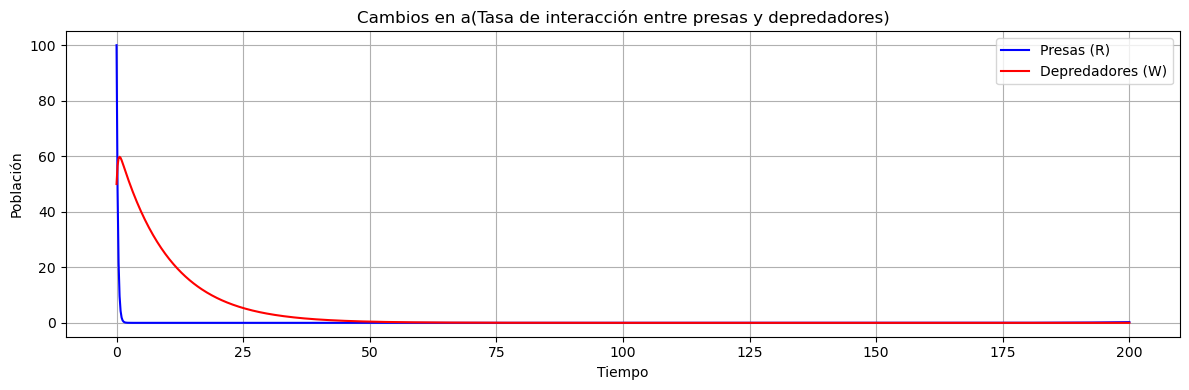

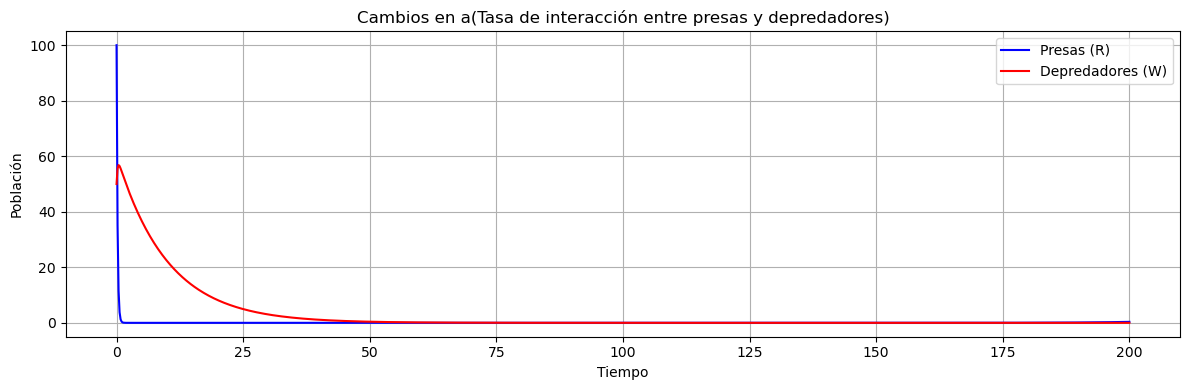

In [19]:
#Cambios para a

for i, ic in enumerate(condiciones_a):
    tspan = [0,200]
    t_eval = np.linspace(*tspan, 1000) 
    solucion_a = solve_ivp(LotkaVolterra, tspan, condiciones_iniciales, args= ic, t_eval=t_eval)
    plt.figure(figsize=(12, 4))
    plt.plot(solucion_a.t, solucion_a.y[0], label='Presas (R)', color='blue')
    plt.plot(solucion_a.t, solucion_a.y[1], label='Depredadores (W)', color='red')
    plt.title("Cambios en a(Tasa de interacción entre presas y depredadores)")
    plt.xlabel('Tiempo')
    plt.ylabel('Población')
    plt.legend(loc='best')
    plt.grid()
    plt.tight_layout()

    plt.show()

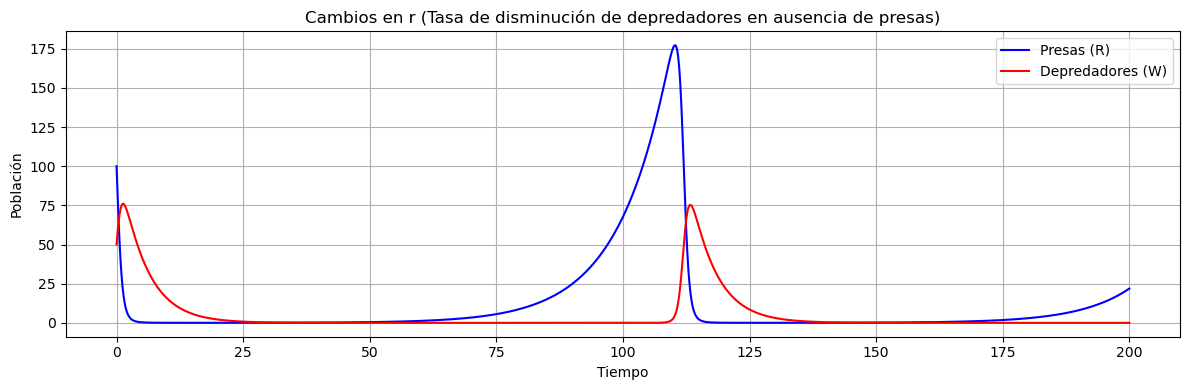

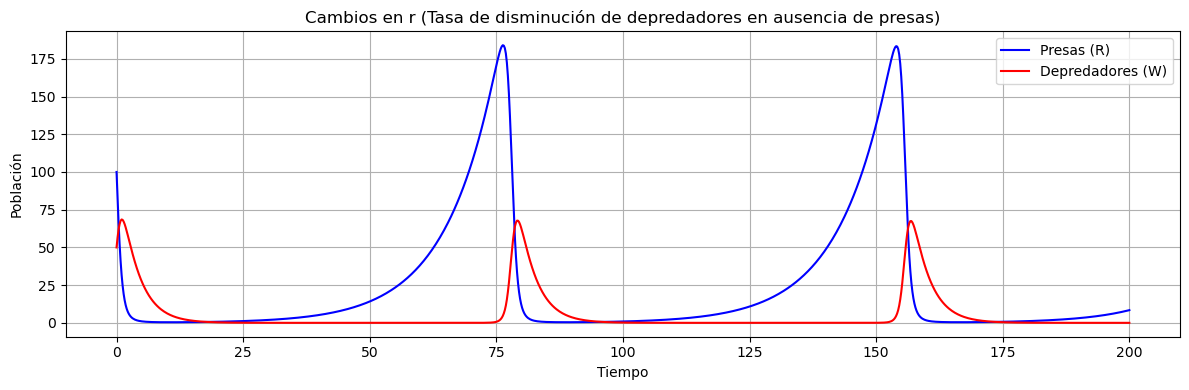

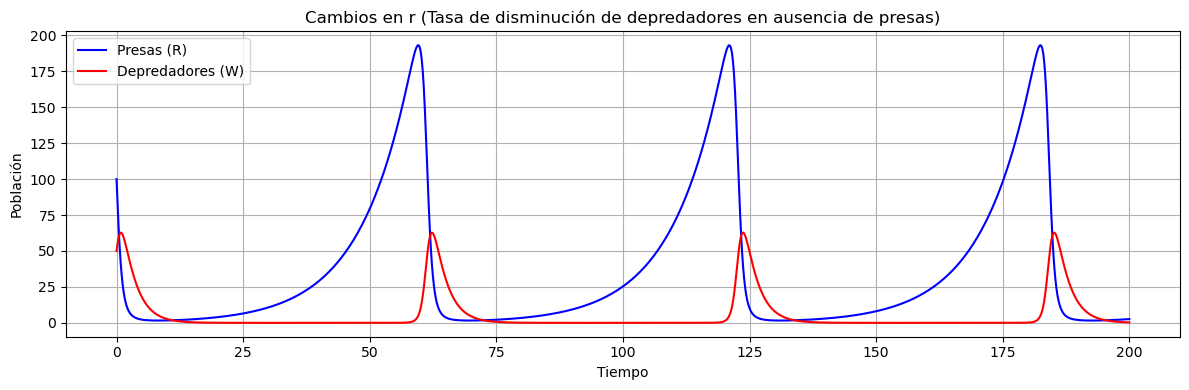

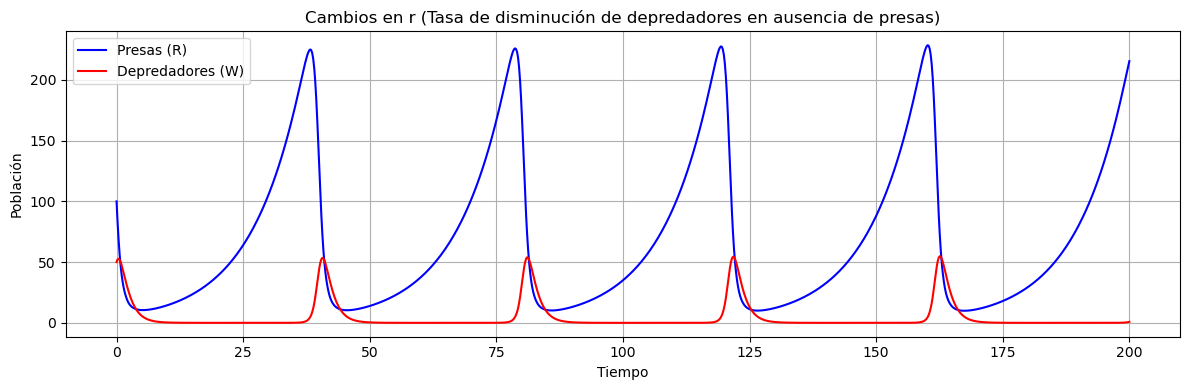

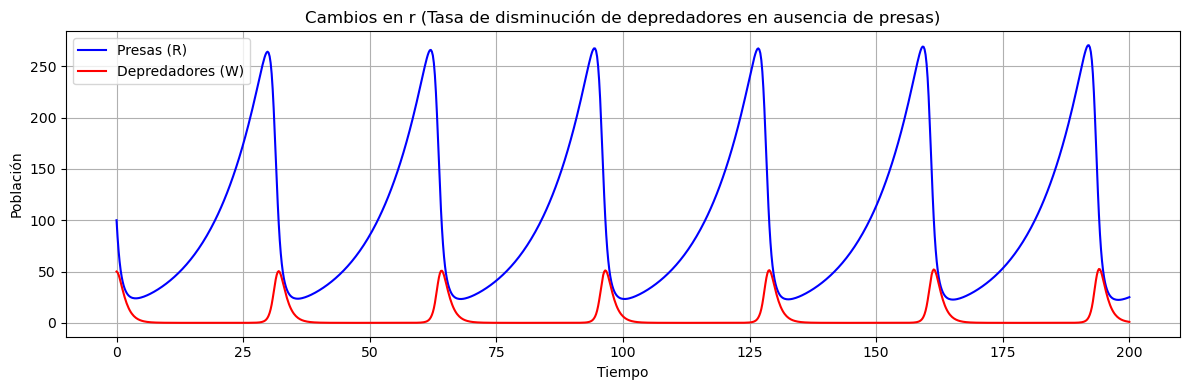

In [21]:
#Cambios para r

for i, ic in enumerate(condiciones_r):
    tspan = [0,200]
    t_eval = np.linspace(*tspan, 1000) 
    solucion_r = solve_ivp(LotkaVolterra, tspan, condiciones_iniciales, args= ic, t_eval=t_eval)   
    plt.figure(figsize=(12, 4))
    plt.plot(solucion_r.t, solucion_r.y[0], label='Presas (R)', color='blue')
    plt.plot(solucion_r.t, solucion_r.y[1], label='Depredadores (W)', color='red')
    plt.title("Cambios en r (Tasa de disminución de depredadores en ausencia de presas)")
    plt.xlabel('Tiempo')
    plt.ylabel('Población')
    plt.legend(loc='best')
    plt.grid()
    plt.tight_layout()

    plt.show()

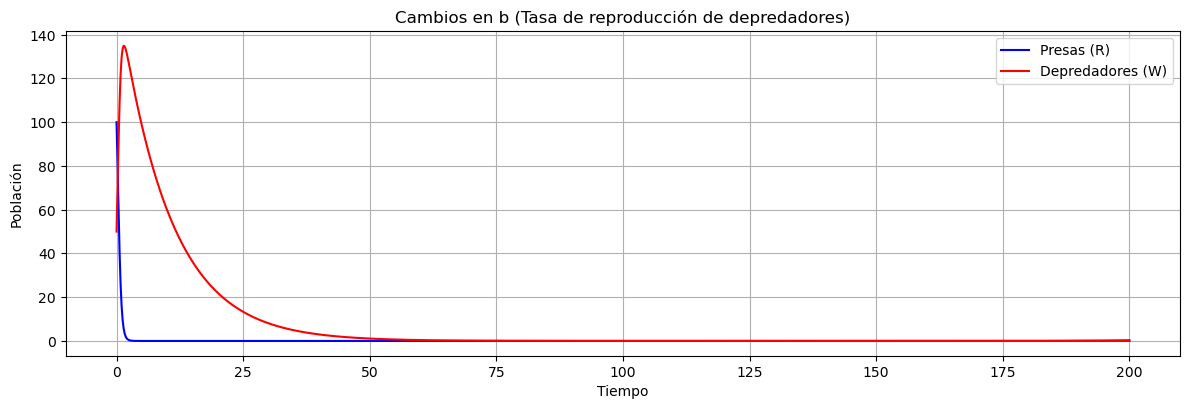

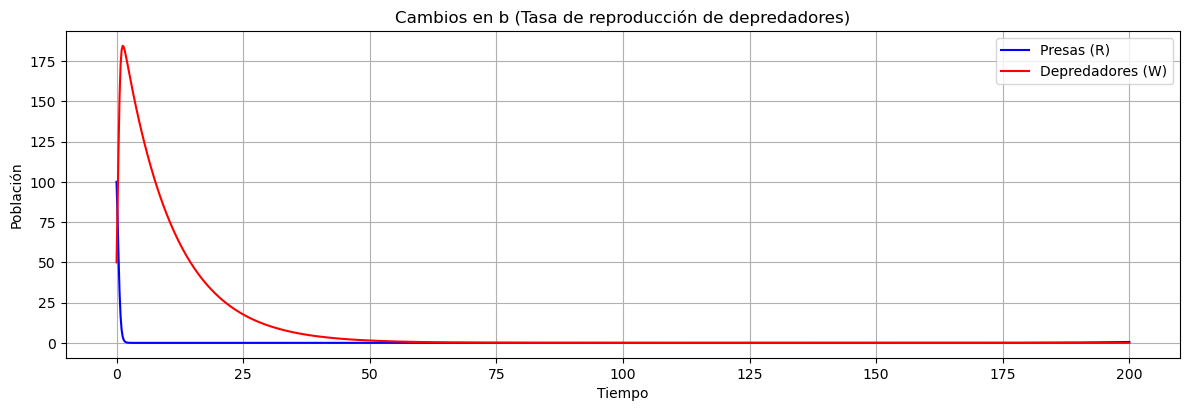

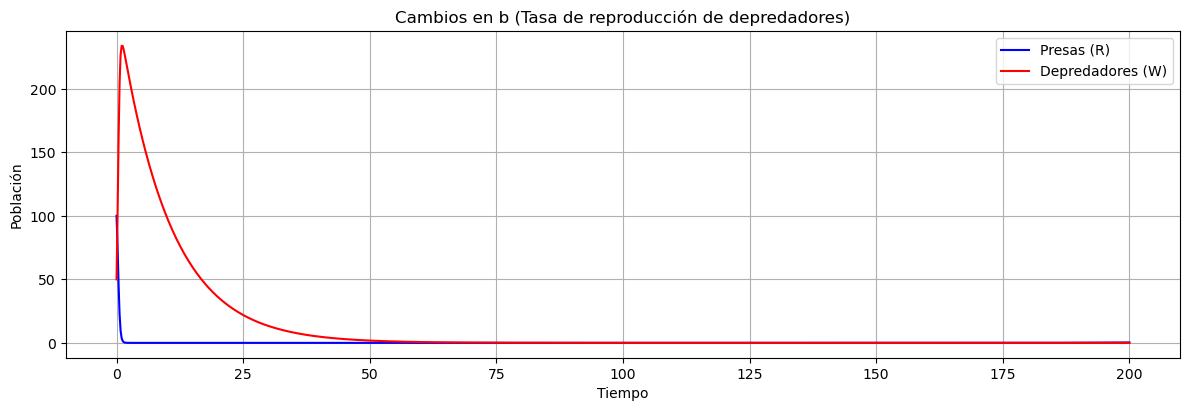

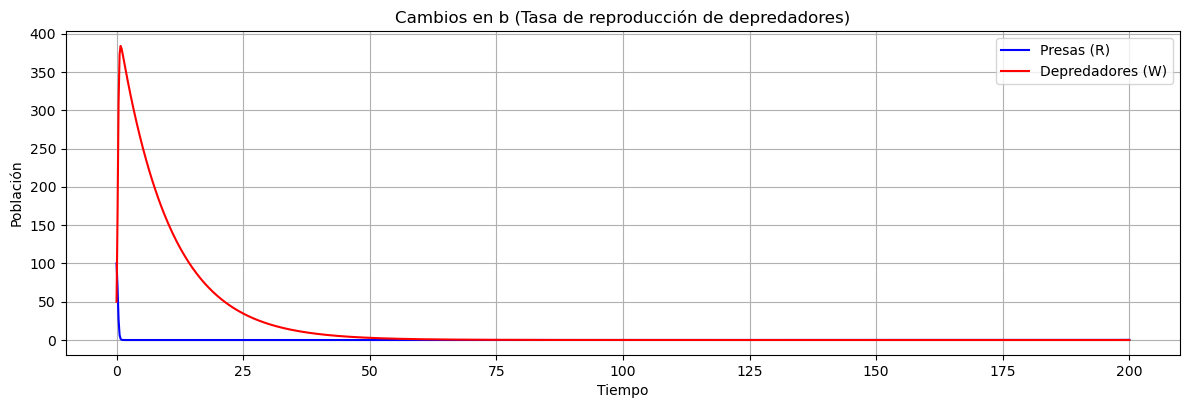

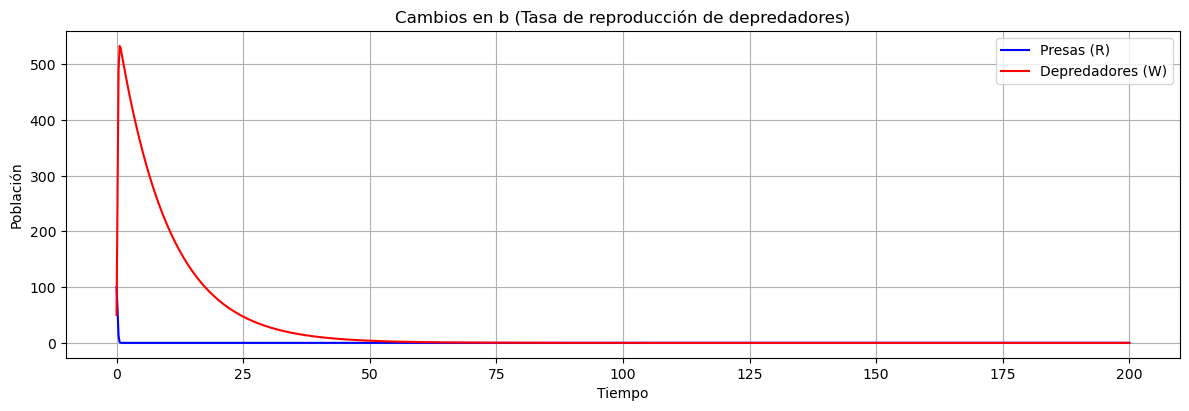

In [22]:
#Cambios para b

for i, ic in enumerate(condiciones_b):
    tspan = [0,200]
    t_eval = np.linspace(*tspan, 1000) 
    solucion_b = solve_ivp(LotkaVolterra, tspan, condiciones_iniciales, args= ic, t_eval=t_eval)
    plt.figure(figsize=(12, 4))
    plt.plot(solucion_b.t, solucion_b.y[0], label='Presas (R)', color='blue')
    plt.plot(solucion_b.t, solucion_b.y[1], label='Depredadores (W)', color='red')
    plt.xlabel('Tiempo')
    plt.ylabel('Población')
    plt.legend(loc='best')
    plt.grid()
    plt.tight_layout()
    plt.title("Cambios en b (Tasa de reproducción de depredadores)")
    plt.show()

### Conclusiones.

Se realizaron los objetivos con éxito pues, se generó la solución del modelo logístico que representa la interacción presa-depredador y gracias a las gráficas, se hizo un analisis más a fondo del modelo, además que se observó la relevancia de cada variable natural que influye en el modelo Lotka - Volterra.

La variable K, que representa la tasa de crecimiento de presas en ausencia de depredadores, aumenta naturalmente la rapidez en que las presas vuelven al 100% de su totalidad.

La variable a, que representa la tasa de interacción entre depredadores y presas, hace que el aumento de depredadores disminuya, conforme la variable aumenta.

La variable r, que representa la tasa de disminución de depredadores en ausencia de presas, al aumentarla, hace que la cantidad de presas en cierto tiempo se potencialice y que la frecuencia de ser cazadas en su totalidad sea mayor.

Y por último, el aumento de la variable b, que representa la tasa de reproducción de los depredadores, hace que la población de depredadores aumenta inicialmente.



### Referencias.

Steard, J. (2012). Cálculo de una variable trascendentes tempranas. (7º ed.), (pp. 622-625). Ciudad de México: Cengage Learning

Saez, A. (2019). Ecuaciones de Lotka-Volterra: modelo presa depredador. Recuperado de: https://pybonacci.org/2015/01/05/ecuaciones-de-lotka-volterra-modelo-presa-depredador/
